In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('./Iris-two-label.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
x1 = data['SepalLengthCm'].values
x2 = data['PetalLengthCm'].values
y = data['Species'].values

#X,Y and bias term
# bias = np.negative(np.ones(len(x1)))
bias = np.full(len(x1),-1)
X = np.array(list(zip(x1,x2)))
# print(X)

#Nominal to numeric [0,1,...]
df = pd.DataFrame(data=y, dtype='category', columns=['label'])
Y = df['label'].cat.codes
Y = np.array(Y)
Y[Y == 0 ] = -1

C:\Users\JIN\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(100, -1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [13]:
# train
clf = svm.SVC( kernel = 'linear', C = 1.0)
clf.fit(X, Y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
clf.predict([[1.5, 0.4]])

array([-1], dtype=int8)

In [15]:
# get support vectors
print(clf.support_vectors_)


# get indices of support vectors
print(clf.support_ )

# get number of support vectors for each class
print(clf.n_support_ )


[[ 4.8  1.9]
 [ 5.1  1.9]
 [ 4.9  3.3]
 [ 5.1  3. ]]
[24 44 57 98]
[2 2]


In [16]:
clf.intercept_


array([-3.82320029])

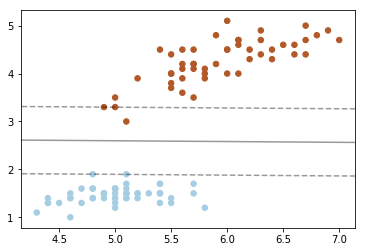

In [20]:
# Plotting maximum margin hyperplane
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.4,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()